Pima Diabetes Dataset

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/dataset/diabetes.csv')

In [ ]:
diabetes_df.head()

In [ ]:
diabetes_df.columns

Null values

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Filling Nan values

In [ ]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

In [ ]:
y = diabetes_df['Outcome']
x = diabetes_df.drop(columns= ['Outcome'])
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Outlier Removal

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:

diabetes_df = diabetes_df.fillna(diabetes_df.mean())
# Impute the missing values with median values
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
diabetes_df.iloc[:, :-1] = imputer.fit_transform(diabetes_df.iloc[:, :-1])

# Standardize the dataset
scaler = StandardScaler()
diabetes_df.iloc[:, :-1] = scaler.fit_transform(diabetes_df.iloc[:, :-1])



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_imputed = diabetes_df.fillna(diabetes_df.mean())
# Calculate the IQR for each column


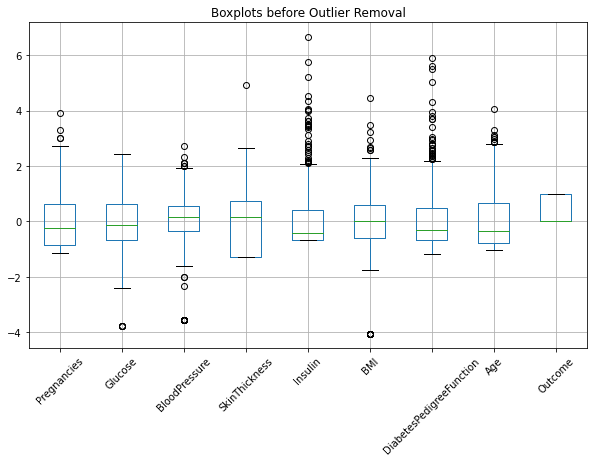

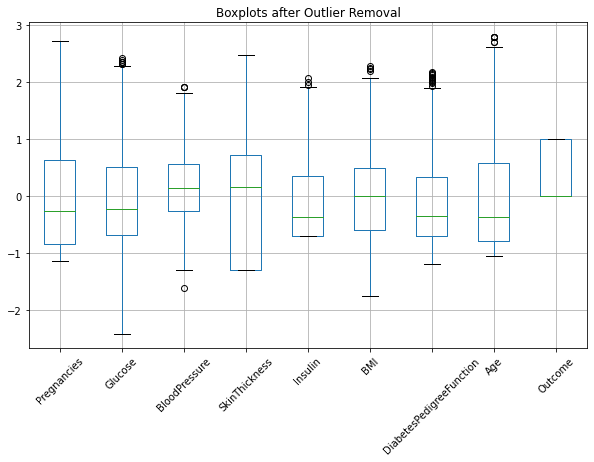

In [ ]:
plt.figure(figsize=(10,6))
diabetes_df.boxplot()
plt.title('Boxplots before Outlier Removal')
plt.xticks(rotation=45)
plt.show()

# Remove outliers using IQR method
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1
df_out = diabetes_df[~((diabetes_df < (Q1 - 1.5 * IQR)) | (diabetes_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot boxplots after outlier removal
plt.figure(figsize=(10,6))
df_out.boxplot()
plt.title('Boxplots after Outlier Removal')
plt.xticks(rotation=45)
plt.show()

Feature Selection

In [ ]:
# Split the dataset into training and testing sets
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df.iloc[:, -1].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train_df = pd.DataFrame(X_train, columns=data.columns[:-1])


In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

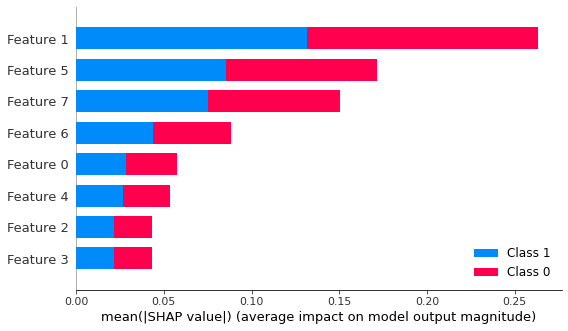

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Explain the model predictions using SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Plot the feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Print the feature names with their corresponding SHAP values
#shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_values_2d = np.squeeze(shap_values)
#shap_df = pd.DataFrame(shap_values_2d, columns=X_train_df.columns)
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

shap_df = shap_df.abs().mean().sort_values(ascending=False).reset_index()
shap_df.columns = ['Feature', 'SHAP Value']
print(shap_df)
print(shap_values.shape)

In [ ]:
diabetes_df = diabetes_df.drop(['SkinThickness','DiabetesPedigreeFunction'], axis=1)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from sklearn.model_selection import cross_val_score
from hyperopt import tpe, space_eval
from hyperopt.pyll.stochastic import sample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import optuna

Cross fold

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Random Forest Hyperparametr Tuning

In [ ]:
def objective_rfc(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    rfc = RandomForestClassifier(random_state=42, **params)
    score = np.mean(cross_val_score(rfc, X_train, y_train, cv=5))
    return score

search_rfc = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces={
        'n_estimators': (100, 1000),
        'max_depth': (2, 50),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 10),
        'max_features': ['sqrt', 'log2', None]
    },
    n_iter=25,
    cv=5,
    scoring='accuracy'
)

search_rfc.fit(X_train, y_train)

# Print the best parameters for Random Forest
print("Best params for Random Forest:", search_rfc.best_params_)



Best params for Random Forest: OrderedDict([('max_depth', 7), ('max_features', None), ('min_samples_leaf', 9), ('min_samples_split', 6), ('n_estimators', 127)])


Gradient Boosting Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning for Gradient Boosting using Optuna
def objective_gbc(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 50),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    gbc = GradientBoostingClassifier(random_state=42, **params)
    score = np.mean(cross_val_score(gbc, X_train, y_train, cv=5))
    return score

search_gbc = BayesSearchCV(
estimator=GradientBoostingClassifier(random_state=42),
search_spaces={
'n_estimators': (100, 1000),
'max_depth': (2, 50),
'learning_rate': (0.001, 1.0),
'min_samples_split': (2, 10),
'min_samples_leaf': (1, 10),
'max_features': ['sqrt', 'log2', None]
},
n_iter=25,
cv=5,
scoring='accuracy'
)
search_gbc.fit(X_train, y_train)

#Print the best parameters for Gradient Boosting
print("Best params for Gradient Boosting:", search_gbc.best_params_)



Best params for Gradient Boosting: OrderedDict([('learning_rate', 0.32251002211489865), ('max_depth', 21), ('max_features', None), ('min_samples_leaf', 1), ('min_samples_split', 8), ('n_estimators', 466)])


SVM hyperparameter tuning

In [ ]:
#Hyperparameter tuning for SVM using Bayesian Optimization
svm_params = {
'C': (1e-6, 1e+6, 'log-uniform'),
'gamma': (1e-6, 1e+1, 'log-uniform'),
'degree': (1, 8),
'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_bayes = BayesSearchCV(
SVC(probability=True),
svm_params,
n_iter=25,
cv=5
)

svm_bayes.fit(X_train, y_train)
print("Best params for SVM:", svm_bayes.best_params_)


Best params for SVM: OrderedDict([('C', 1.3202466699243387), ('degree', 5), ('gamma', 0.01959816041088472), ('kernel', 'rbf')])


In [ ]:
lrc=LogisticRegression(random_state=42)

In [ ]:
rfc = RandomForestClassifier(random_state=42, **search_rfc.best_params_)
gbc = GradientBoostingClassifier(random_state=42, **search_gbc.best_params_)
svm = SVC(**svm_bayes.best_params_, probability=True)
# Define the stacking ensemble classifier
svm = SVC(random_state=42, probability=True)
stacking_clf = StackingClassifier(
    estimators=[('rfc', rfc), ('gbc', gbc), ('lrc', lrc)],
    final_estimator=svm
)
    
    # Fit the stacking ensemble classifier
    stacking_clf.fit(X_train, y_train)
    
    # Compute accuracy on the test set
    y_pred = stacking_clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best hyperparameters and their corresponding accuracy score
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

[I 2023-03-22 23:24:13,194] A new study created in memory with name: no-name-9762f4aa-cc98-4781-8cff-6b10647f3d8c
[I 2023-03-22 23:24:16,969] Trial 0 finished with value: 0.7625 and parameters: {'rf_n_estimators': 158, 'gb_n_estimators': 112, 'dt_max_depth': 14}. Best is trial 0 with value: 0.7625.
[I 2023-03-22 23:24:19,903] Trial 1 finished with value: 0.75 and parameters: {'rf_n_estimators': 187, 'gb_n_estimators': 130, 'dt_max_depth': 18}. Best is trial 0 with value: 0.7625.
[I 2023-03-22 23:24:22,402] Trial 2 finished with value: 0.7625 and parameters: {'rf_n_estimators': 148, 'gb_n_estimators': 155, 'dt_max_depth': 16}. Best is trial 0 with value: 0.7625.
[I 2023-03-22 23:24:23,803] Trial 3 finished with value: 0.75 and parameters: {'rf_n_estimators': 65, 'gb_n_estimators': 116, 'dt_max_depth': 2}. Best is trial 0 with value: 0.7625.
[I 2023-03-22 23:24:25,513] Trial 4 finished with value: 0.775 and parameters: {'rf_n_estimators': 116, 'gb_n_estimators': 72, 'dt_max_depth': 20}. 

Best hyperparameters: {'rf_n_estimators': 180, 'gb_n_estimators': 18, 'dt_max_depth': 17}
Best accuracy: 0.8


In [ ]:
pickle.dump(stack_model,open('db76.pkl','wb'))
model=pickle.load(open('db76.pkl','rb'))
model

StackingClassifier(cv=5,
                   estimators=[('dtc', DecisionTreeClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC())],
                   final_estimator=SVC())

Severity level Estimation

In [ ]:
# Filter the rows with Outcome = 1 and create a new dataframe
diabetes_label_1 = diabetes_df.loc[diabetes_df['Outcome'] == 1].copy()

# Reset the index of the new dataframe
diabetes_label_1.reset_index(drop=True, inplace=True)

# Save the new dataframe to a CSV file
diabetes_label_1.to_csv('diabetes_label_1.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# Load dataset
diabetes = pd.read_csv('/content/drive/MyDrive/db_1.csv')




In [ ]:
diabetes_copy = diabetes_df.copy(deep = True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [ ]:
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace = True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace = True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace = True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace = True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace = True)

In [ ]:
y = diabetes['Outcome']
x = diabetes.drop(columns= ['Outcome'])
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,8,183,64,0,0,23.3,0.672,32,1
2,0,137,40,35,168,43.1,2.288,33,1
3,3,78,50,32,88,31.0,0.248,26,1
4,2,197,70,45,543,30.5,0.158,53,1


In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering.fit(x)

# Assign severity levels
severity_levels = []
for label in clustering.labels_:
    if label == 0:
        severity_levels.append('low')
    elif label == 1:
        severity_levels.append('medium')
    else:
        severity_levels.append('high')
        
diabetes['Severity'] = severity_levels

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
diabetes.iloc[:, -1] = labelencoder.fit_transform(diabetes.iloc[:, -1])

In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Severity'],
      dtype='object')

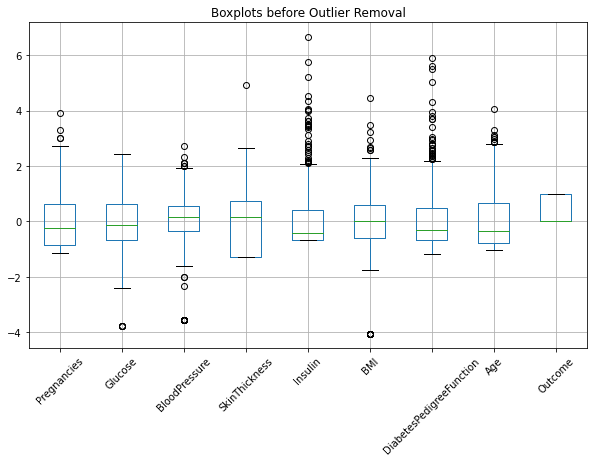

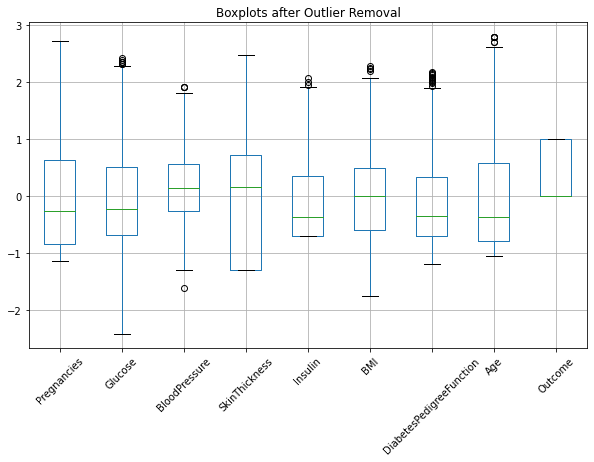

In [ ]:
plt.figure(figsize=(10,6))
diabetes_df.boxplot()
plt.title('Boxplots before Outlier Removal')
plt.xticks(rotation=45)
plt.show()

# Remove outliers using IQR method
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1
df_out = diabetes_df[~((diabetes_df < (Q1 - 1.5 * IQR)) | (diabetes_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot boxplots after outlier removal
plt.figure(figsize=(10,6))
df_out.boxplot()
plt.title('Boxplots after Outlier Removal')
plt.xticks(rotation=45)
plt.show()

Feature Selection

In [ ]:
# Split the dataset into training and testing sets
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df.iloc[:, -1].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train_df = pd.DataFrame(X_train, columns=data.columns[:-1])


In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

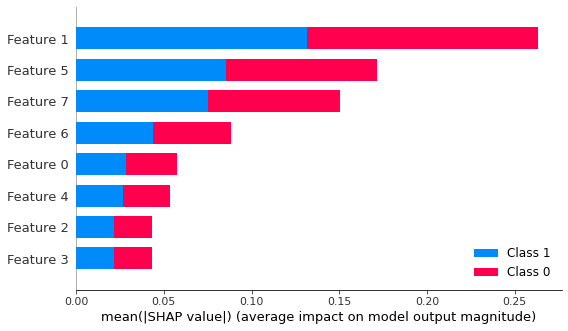

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Explain the model predictions using SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Plot the feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Print the feature names with their corresponding SHAP values
#shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_values_2d = np.squeeze(shap_values)
#shap_df = pd.DataFrame(shap_values_2d, columns=X_train_df.columns)
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

shap_df = shap_df.abs().mean().sort_values(ascending=False).reset_index()
shap_df.columns = ['Feature', 'SHAP Value']
print(shap_df)
print(shap_values.shape)

In [ ]:
diabetes_df = diabetes_df.drop(['SkinThickness','DiabetesPedigreeFunction'], axis=1)


In [ ]:
diabetes = diabetes.drop('Outcome',axis=1)

In [ ]:
y1 = diabetes['Severity']
x1 = diabetes.drop(columns= ['Severity'])

In [ ]:
labels = diabetes['Severity']

# Instantiate a LabelEncoder object and fit_transform the labels
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)
print("Class names with corresponding labels:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name}: {i}")


Class names with corresponding labels:
High: 0
Low: 1
Medium: 2


In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Severity'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size=0.3, random_state=0)



In [ ]:
def objective_rfc(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    rfc = RandomForestClassifier(random_state=42, **params)
    score = np.mean(cross_val_score(rfc, X_train, y_train, cv=5))
    return score

search_rfc = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces={
        'n_estimators': (100, 1000),
        'max_depth': (2, 50),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 10),
        'max_features': ['sqrt', 'log2', None]
    },
    n_iter=25,
    cv=5,
    scoring='accuracy'
)

search_rfc.fit(X_train, y_train)

# Print the best parameters for Random Forest
print("Best params for Random Forest:", search_rfc.best_params_)



Best params for Random Forest: OrderedDict([('max_depth', 7), ('max_features', None), ('min_samples_leaf', 9), ('min_samples_split', 6), ('n_estimators', 127)])


Gradient Boosting Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning for Gradient Boosting using Optuna
def objective_gbc(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 50),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    gbc = GradientBoostingClassifier(random_state=42, **params)
    score = np.mean(cross_val_score(gbc, X_train, y_train, cv=5))
    return score

search_gbc = BayesSearchCV(
estimator=GradientBoostingClassifier(random_state=42),
search_spaces={
'n_estimators': (100, 1000),
'max_depth': (2, 50),
'learning_rate': (0.001, 1.0),
'min_samples_split': (2, 10),
'min_samples_leaf': (1, 10),
'max_features': ['sqrt', 'log2', None]
},
n_iter=25,
cv=5,
scoring='accuracy'
)
search_gbc.fit(X_train, y_train)

#Print the best parameters for Gradient Boosting
print("Best params for Gradient Boosting:", search_gbc.best_params_)



Best params for Gradient Boosting: OrderedDict([('learning_rate', 0.32251002211489865), ('max_depth', 21), ('max_features', None), ('min_samples_leaf', 1), ('min_samples_split', 8), ('n_estimators', 466)])


SVM hyperparameter tuning

In [ ]:
#Hyperparameter tuning for SVM using Bayesian Optimization
svm_params = {
'C': (1e-6, 1e+6, 'log-uniform'),
'gamma': (1e-6, 1e+1, 'log-uniform'),
'degree': (1, 8),
'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_bayes = BayesSearchCV(
SVC(probability=True),
svm_params,
n_iter=25,
cv=5
)

svm_bayes.fit(X_train, y_train)
print("Best params for SVM:", svm_bayes.best_params_)


Best params for SVM: OrderedDict([('C', 1.3202466699243387), ('degree', 5), ('gamma', 0.01959816041088472), ('kernel', 'rbf')])


In [ ]:
lrc =LogisticRegression(random_state=42)
rfc = RandomForestClassifier(random_state=42, **search_rfc.best_params_)
gbc = GradientBoostingClassifier(random_state=42, **search_gbc.best_params_)
svm = SVC(**svm_bayes.best_params_, probability=True)

# Define the stacking ensemble classifier
svm = SVC(random_state=42, probability=True)
stacking_clf = StackingClassifier(
    estimators=[('rfc', rf), ('lrc', gb), ('gbc', nb)],
    final_estimator=svm
)

# Define the objective function for hyperparameter optimization
def objective(trial):
    # Define hyperparameters to tune for each base classifier
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 10, 200)
    gb_n_estimators = trial.suggest_int('gb_n_estimators', 10, 200)
      #  dt_max_depth = trial.suggest_int('dt_max_depth', 1, 20)
    
    # Update the base classifiers with the tuned hyperparameters
    rf.set_params(n_estimators=rf_n_estimators)
    gb.set_params(n_estimators=gb_n_estimators)
  #  dt.set_params(max_depth=dt_max_depth)
    
    # Fit the stacking ensemble classifier
    stacking_clf.fit(X_train, y_train)
    
    # Compute accuracy on the test set
    y_pred = stacking_clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best hyperparameters and their corresponding accuracy score
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)
#7

[I 2023-03-26 23:27:32,810] A new study created in memory with name: no-name-1927ecc5-f42a-4bda-aece-242c9183bdb7
[I 2023-03-26 23:27:34,138] Trial 0 finished with value: 0.9259259259259259 and parameters: {'rf_n_estimators': 26, 'gb_n_estimators': 13}. Best is trial 0 with value: 0.9259259259259259.
[I 2023-03-26 23:27:39,496] Trial 1 finished with value: 0.9259259259259259 and parameters: {'rf_n_estimators': 109, 'gb_n_estimators': 94}. Best is trial 0 with value: 0.9259259259259259.
[I 2023-03-26 23:27:49,372] Trial 2 finished with value: 0.9259259259259259 and parameters: {'rf_n_estimators': 73, 'gb_n_estimators': 179}. Best is trial 0 with value: 0.9259259259259259.
[I 2023-03-26 23:27:52,369] Trial 3 finished with value: 0.9259259259259259 and parameters: {'rf_n_estimators': 88, 'gb_n_estimators': 27}. Best is trial 0 with value: 0.9259259259259259.
[I 2023-03-26 23:27:54,909] Trial 4 finished with value: 0.9259259259259259 and parameters: {'rf_n_estimators': 60, 'gb_n_estimators

Best hyperparameters: {'rf_n_estimators': 35, 'gb_n_estimators': 160}
Best accuracy: 0.9444444444444444


In [ ]:
import pickle
pickle.dump(stacking_clf,open('cl5.pkl','wb'))
model=pickle.load(open('cl5.pkl','rb'))
model